# Feature Matching

**Template Matching**

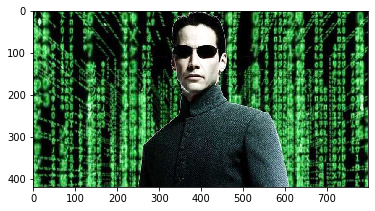

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#VERY IMPORTANT
#SIFT is patented so to use this technique you need to uninstall and install using the commands below:
#!pip uninstall opencv-python -y
#!pip install opencv-contrib-python==3.4.2.
import cv2

fullimg = cv2.imread('TheMatrix(1).jpeg')
fullimg = cv2.cvtColor(fullimg, cv2.COLOR_BGR2RGB)
plt.imshow(fullimg)

*Template Image (subset of Matrix image - isolating the face*

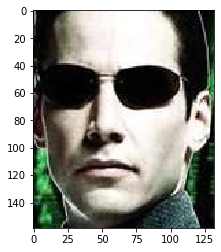

In [5]:
faceimg = cv2.imread('TheMatrixFace.jpg')
faceimg = cv2.cvtColor(faceimg, cv2.COLOR_BGR2RGB)
plt.imshow(faceimg)

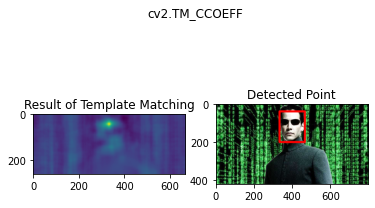

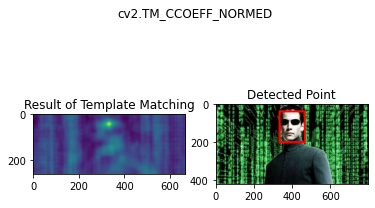

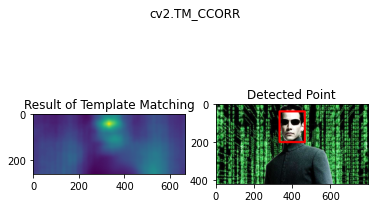

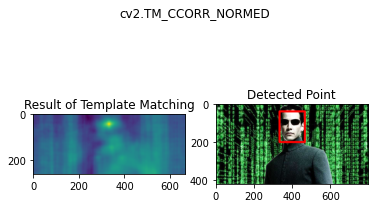

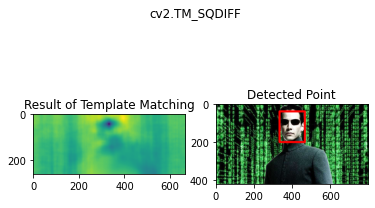

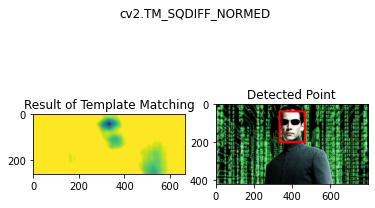

In [3]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
height, width,channels = faceimg.shape
for m in methods:
    
    # Create a copy of the image
    full_copy = fullimg.copy()
    # Get the actual function instead of the string
    method = eval(m)
    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,faceimg,method)
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
       
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.suptitle(m)
    plt.title('Detected Point')
    plt.show()

**Feature Matching**

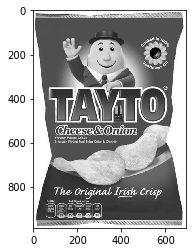

In [7]:
# Load Image
taytoimg = cv2.imread('taytocrisps.jpg', 0)
plt.imshow(taytoimg,cmap='gray')

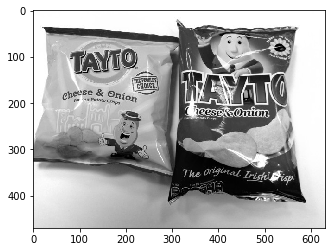

In [8]:
# Load Image
taytomultiimg = cv2.imread('taytonorthsouth.jpg', 0)
plt.imshow(taytomultiimg,cmap='gray')

# Oriented FAST and Rotated Brief (ORB) Descriptors - Brute Force Detection

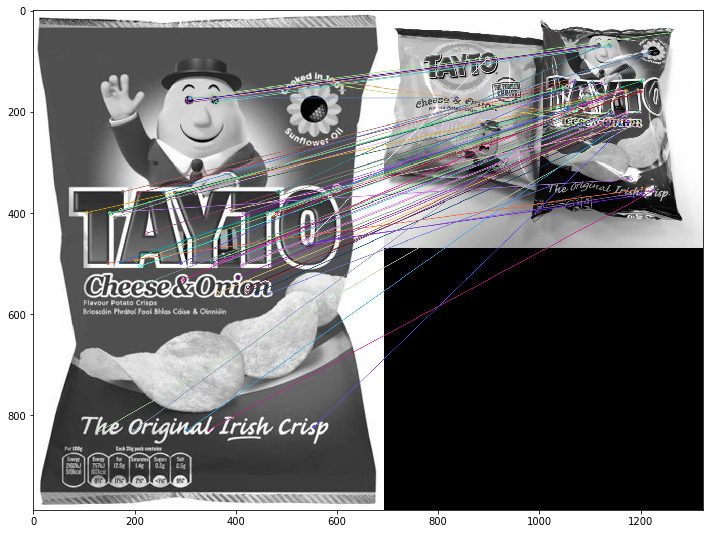

In [9]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
keypoint1, des1 = orb.detectAndCompute(taytoimg,None)
keypoint2, des2 = orb.detectAndCompute(taytomultiimg,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
tayto_matches = cv2.drawMatches(taytoimg,keypoint1,taytomultiimg,keypoint2,matches[:70],None,flags=2)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(tayto_matches,cmap='gray')

# Scale-Invariant Feature Transform (SIFT) Descriptors - Brute Force Detection

In [10]:
# Create SIFT Object
siftfeatures = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
keypoint1, des1 = siftfeatures.detectAndCompute(taytoimg,None)
keypoint2, des2 = siftfeatures.detectAndCompute(taytomultiimg,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
best = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        best.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(taytoimg,keypoint1,taytomultiimg,keypoint2,best,None,flags=2)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(sift_matches,cmap='gray')

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


# Fast Library for Approximate Nearest Neighbor (FLANN) Based Matcher

In [11]:
# Initiate SIFT detector
siftfeatures = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
keypoint1, des1 = siftfeatures.detectAndCompute(taytoimg,None)
keypoint2, des2 = siftfeatures.detectAndCompute(taytomultiimg,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

best = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        best.append([match1])


flann_matches = cv2.drawMatchesKnn(taytoimg,keypoint1,taytomultiimg,keypoint2,best,None,flags=0)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(flann_matches,cmap='gray')

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


# Formatting Results

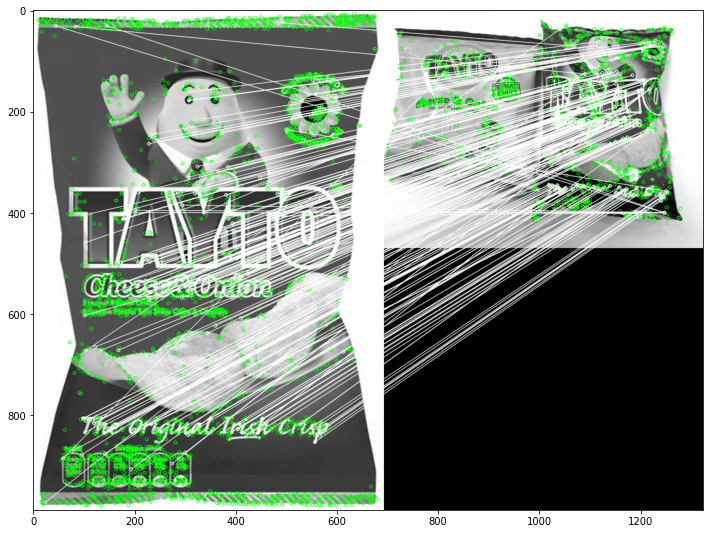

In [9]:
# Initiate SIFT detector
siftfeatures = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
keypoints1, des1 = siftfeatures.detectAndCompute(taytoimg,None)
keypoints2, des2 = siftfeatures.detectAndCompute(taytomultiimg,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=70)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only the best matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (255,255,255),
                   singlePointColor = (0,255,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(taytoimg,keypoints1,taytomultiimg,keypoints2,matches,None,**draw_params)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(flann_matches,cmap='gray')

# Challenge

Change the parameters using each of these techniques, read in a different image where there is a lot more noise and see how it performs.

You can also use additional feature matching techniques such as SURF:
https://docs.opencv.org/3.4.0/df/dd2/tutorial_py_surf_intro.html
